<a href="https://colab.research.google.com/github/Samiimasmoudii/ML-Course-/blob/main/Data_Mining_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import shutil
import random
import pandas as pd
import numpy as np
import antropy as ant


 PARTIE 1 : DÉCOMPRESSION DES DONNÉES

In [ ]:

# Fonction pour créer les répertoires
def creer_repertoires(base_path, sous_dossiers):
    for dossier in sous_dossiers:
        chemin = os.path.join(base_path, dossier)
        os.makedirs(chemin, exist_ok=True)
    return [os.path.join(base_path, dossier) for dossier in sous_dossiers]

# Chemins pour le fichier zip et l'extraction
chemin_zip = '/content/EEG_data.zip'
chemin_extraction = '/content/EEG_data'

# Décompresser le fichier zip
with zipfile.ZipFile(chemin_zip, 'r') as zip_ref:
    zip_ref.extractall(chemin_extraction)

# Créer les chemins pour les sous-dossiers
sous_dossiers = [
    'EEG_data/AD/Eyes_open',
    'EEG_data/AD/Eyes_closed',
    'EEG_data/Healthy/Eyes_open',
    'EEG_data/Healthy/Eyes_closed'
]
chemins = creer_repertoires(chemin_extraction, sous_dossiers)


2-Selection et Copie Aléatoire

In [ ]:

# Définir les chemins pour les données des patients
chemin_yeux_ouverts_healthy = chemins[2]  # Healthy/Eyes_open
chemin_yeux_fermés_healthy = chemins[3]  # Healthy/Eyes_closed
chemin_yeux_ouverts_ad = chemins[0]       # AD/Eyes_open
chemin_yeux_fermés_ad = chemins[1]        # AD/Eyes_closed

# Créer les répertoires pour les données sélectionnées
chemin_données_sélectionnées = '/content/selected_data'
creer_repertoires(chemin_données_sélectionnées, ['Healthy', 'AD'])


['/content/selected_data/Healthy', '/content/selected_data/AD']

3-Affichage & Lecture des données

In [ ]:
import os
import random
import shutil

# Chemins des dossiers source et destination
chemin_yeux_ouverts_healthy = '/content/EEG_data/EEG_data/Healthy/Eyes_open'  # Remplacez par le chemin réel
chemin_yeux_fermés_healthy = '/content/EEG_data/EEG_data/Healthy/Eyes_closed'  # Remplacez par le chemin réel
chemin_yeux_ouverts_ad = '/content/EEG_data/EEG_data/AD/Eyes_open'  # Remplacez par le chemin réel
chemin_yeux_fermés_ad = '/content/EEG_data/EEG_data/AD/Eyes_closed'  # Remplacez par le chemin réel

# Fonction pour copier aléatoirement les répertoires de patients


def copier_repertoires_patients_aleatoirement(dossier_src, dossier_dest, nb_patients):
    os.makedirs(dossier_dest, exist_ok=True)
    tous_les_patients = os.listdir(dossier_src)
    patients_selectionnes = random.sample(tous_les_patients, nb_patients)

    for patient in patients_selectionnes:
        repertoire_patient_src = os.path.join(dossier_src, patient)
        repertoire_patient_dest = os.path.join(dossier_dest, patient)

        # Check if the destination directory already exists
        if not os.path.exists(repertoire_patient_dest):
            shutil.copytree(repertoire_patient_src, repertoire_patient_dest)
        else:
            print(f"Le répertoire {repertoire_patient_dest} existe déjà. Ignoré.")

# Copier aléatoirement 12 patients "Healthy" (Yeux Ouverts et Fermés)
copier_repertoires_patients_aleatoirement(chemin_yeux_ouverts_healthy, os.path.join(chemin_données_sélectionnées, 'Healthy', 'Eyes_open'), 12)
copier_repertoires_patients_aleatoirement(chemin_yeux_fermés_healthy, os.path.join(chemin_données_sélectionnées, 'Healthy', 'Eyes_closed'), 12)

# Copier aléatoirement 80 patients "AD" (Yeux Ouverts et Fermés)
copier_repertoires_patients_aleatoirement(chemin_yeux_ouverts_ad, os.path.join(chemin_données_sélectionnées, 'AD', 'Eyes_open'), 80)
copier_repertoires_patients_aleatoirement(chemin_yeux_fermés_ad, os.path.join(chemin_données_sélectionnées, 'AD', 'Eyes_closed'), 80)

# Vérifier la sélection aléatoire
print("Patients 'Healthy' Yeux Ouverts : ", len(os.listdir(os.path.join(chemin_données_sélectionnées, 'Healthy', 'Eyes_open'))))
print("Patients 'Healthy' Yeux Fermés : ", len(os.listdir(os.path.join(chemin_données_sélectionnées, 'Healthy', 'Eyes_closed'))))
print("Patients 'AD' Yeux Ouverts : ", len(os.listdir(os.path.join(chemin_données_sélectionnées, 'AD', 'Eyes_open'))))
print("Patients 'AD' Yeux Fermés : ", len(os.listdir(os.path.join(chemin_données_sélectionnées, 'AD', 'Eyes_closed'))))

Patients 'Healthy' Yeux Ouverts :  12
Patients 'Healthy' Yeux Fermés :  12
Patients 'AD' Yeux Ouverts :  80
Patients 'AD' Yeux Fermés :  80


In [ ]:

# Fonction pour extraire les données EEG du répertoire de chaque patient
def extraire_donnees_patient(repertoire_patient):
    donnees_patient = []
    for nom_fichier in os.listdir(repertoire_patient):
        chemin_fichier = os.path.join(repertoire_patient, nom_fichier)
        with open(chemin_fichier, 'r') as fichier:
            valeurs = fichier.readlines()
            valeurs = [float(valeur.strip()) for valeur in valeurs if valeur.strip()]
            donnees_patient.extend(valeurs)
    return donnees_patient

# Fonction pour extraire les données à partir d'une liste de répertoires de patients
def extraire_donnees_depuis_patients(dossier_base, etiquette):
    donnees = []
    etiquettes = []
    for repertoire_patient in os.listdir(dossier_base):
        chemin_complet_patient = os.path.join(dossier_base, repertoire_patient)
        donnees_patient = extraire_donnees_patient(chemin_complet_patient)
        donnees.append(donnees_patient)
        etiquettes.append(etiquette)
    return donnees, etiquettes

# Extraire les données des patients "Healthy" et "AD"
donnees_healthy_ouvertes, etiquettes_healthy_ouvertes = extraire_donnees_depuis_patients(chemin_yeux_ouverts_healthy, etiquette=0)
donnees_healthy_fermees, etiquettes_healthy_fermees = extraire_donnees_depuis_patients(chemin_yeux_fermés_healthy, etiquette=0)
donnees_ad_ouvertes, etiquettes_ad_ouvertes = extraire_donnees_depuis_patients(chemin_yeux_ouverts_ad, etiquette=1)
donnees_ad_fermees, etiquettes_ad_fermees = extraire_donnees_depuis_patients(chemin_yeux_fermés_ad, etiquette=1)

# Combiner les données et les étiquettes des patients "Healthy" et "AD"
donnees = donnees_healthy_ouvertes + donnees_healthy_fermees + donnees_ad_ouvertes + donnees_ad_fermees
etiquettes = etiquettes_healthy_ouvertes + etiquettes_healthy_fermees + etiquettes_ad_ouvertes + etiquettes_ad_fermees

# Convertir les données en un DataFrame pandas
df = pd.DataFrame(donnees)

# Afficher le DataFrame résultant et les premières lignes
print("Données extraites des patients :")
print(df.head())  # Afficher les 5 premières lignes du DataFrame

# Afficher la taille du DataFrame et les étiquettes
print("\nTaille du DataFrame :", df.shape)
print("Étiquettes des données :", etiquettes)

# Analyse descriptive des données
df.describe()  # Résumé statistique

# Ajouter les étiquettes au DataFrame
df['Etiquette'] = etiquettes

# Calculer les moyennes, les min, max, et l'entropie par groupe
resultats = df.groupby('Etiquette').agg(
    moyenne=pd.NamedAgg(column=0, aggfunc='mean'),
    min=pd.NamedAgg(column=0, aggfunc='min'),
    max=pd.NamedAgg(column=0, aggfunc='max'),
    entropie=pd.NamedAgg(column=0, aggfunc=lambda x: ant.perm_entropy(x, normalize=True))
).reset_index()

print("\nRésultats de l'analyse :")
print(resultats)

# Interprétation des résultats
for index, row in resultats.iterrows():
    etiquette = "Sain" if row['Etiquette'] == 0 else "AD"
    print(f"\nPatients {etiquette} - Moyenne: {row['moyenne']}, Min: {row['min']}, Max: {row['max']}, Entropie: {row['entropie']}")


Données extraites des patients :
       0          1          2        3        4        5          6      \
0  26.799000  28.789000  25.804001  14.8590   7.8939   7.8939  16.849001   
1 -13.861000  -9.901000  -6.930700  -7.9208 -11.8810  -9.9010 -10.891000   
2  -5.000000   2.000000   9.000000  16.0000  15.0000  11.0000   7.000000   
3   1.923700   1.923700   6.898800  10.8790  10.8790  10.8790  11.874000   
4  24.686001  22.705999  21.716000  19.7360  15.7760  13.7950   9.835000   

     7          8       9      ...    21494    21495      21496   21497  \
0  26.7990  31.774000  28.789  ...   8.0402   8.0402  -1.005000 -10.050   
1 -14.8510 -17.822001 -20.792  ...   5.0000   8.0000   9.000000  11.000   
2   5.0000   6.000000  12.000  ...  -1.0050  -3.0151   0.000000   0.000   
3  10.8790  10.879000  11.874  ... -23.2320 -21.2120 -19.191999 -20.202   
4   6.8647  13.795000  13.795  ...   9.0000   4.0000   6.000000   7.000   

       21498      21499    21500    21501   21502    21503 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numerical features for scaling
numerical_features = df.drop('Etiquette', axis=1)

labels = df['Etiquette']

# Apply StandardScaler to numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# Create a DataFrame for the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features.columns)

# Add the 'Etiquette' column back to the scaled DataFrame
all_data_normalized = pd.concat([scaled_df, df['Etiquette']], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Séparation des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels, test_size=0.2, random_state=42)


Extraction des données encodées

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense

# Paramètres de l'autoencodeur
input_dim = X_train.shape[1]  # Nombre de caractéristiques d'entrée (21504)
encoding_dim = 64  # Taille de la couche encodée

# Création des couches de l'autoencodeur
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Compilation du modèle
autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement de l'autoencodeur
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, validation_data=(X_test, X_test))

# Création du modèle d'encodeur
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[1].output)

# Encodage des données d'entraînement et de test
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: nan - val_loss: nan
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - loss: nan - val_loss: nan
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step - loss: nan - val_loss: nan
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: nan - val_loss: nan
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step - loss: nan - val_loss: nan
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: nan - val_loss: nan
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: nan - val_loss: nan
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - loss: nan - val_loss: nan
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - loss: nan - val_loss: nan
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - loss: nan - val_loss: nan
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - loss: nan - val_loss: nan
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: nan - val_loss: nan
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - loss: nan -

Random Forest

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.86      1.00      0.93        32

    accuracy                           0.86        37
   macro avg       0.43      0.50      0.46        37
weighted avg       0.75      0.86      0.80        37



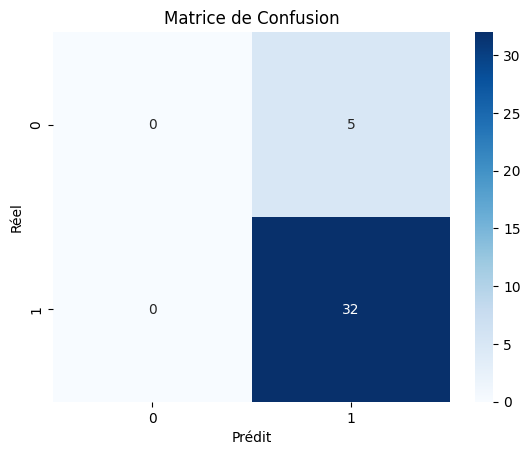

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Entraînement du modèle Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_encoded, y_train)

# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test_encoded)

# Évaluation du modèle
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Réel')
plt.xlabel('Prédit')
plt.title('Matrice de Confusion Random Forest')
plt.show()


Accuracy of the decision tree: 0.857
Precision of the decision tree: 0.651
Recall of the decision tree: 0.612


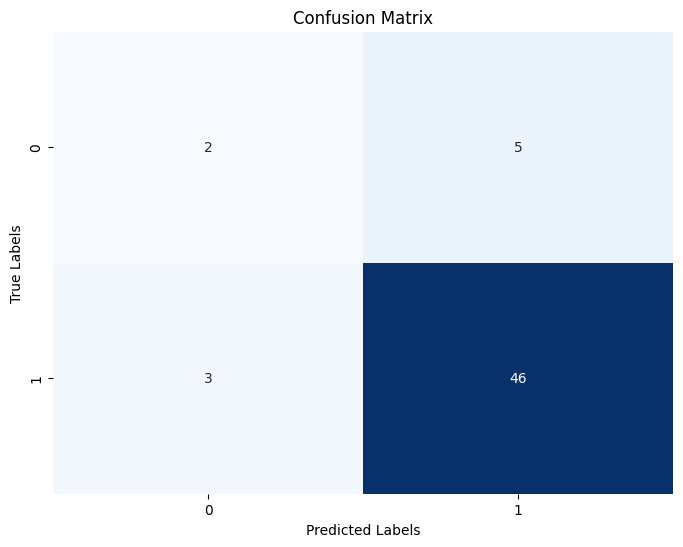

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assume df is the feature dataframe and 'Etiquette' is the target label
labels = df['Etiquette']
features = df.drop(columns=['Etiquette'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
recall = recall_score(y_test, y_pred, average='macro')        # 'macro' for multi-class

print(f'Accuracy of the decision tree: {accuracy:.3f}')
print(f'Precision of the decision tree: {precision:.3f}')
print(f'Recall of the decision tree: {recall:.3f}')

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Decision Tree')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the SVM: 0.875
Precision of the SVM: 0.438
Recall of the SVM: 0.500


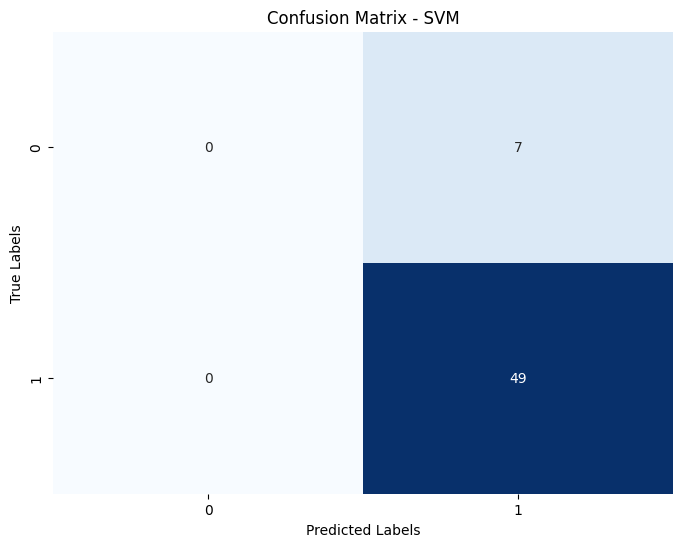

In [68]:
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is the feature dataframe and 'Etiquette' is the target label
labels = df['Etiquette']
features = df.drop(columns=['Etiquette'])

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Fit the imputer on the training data and transform both training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Support Vector Classifier (SVM)
svm_clf = SVC()
svm_clf.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test_imputed)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='macro')  # 'macro' for multi-class
recall_svm = recall_score(y_test, y_pred_svm, average='macro')         # 'macro' for multi-class

print(f'Accuracy of the SVM: {accuracy_svm:.3f}')
print(f'Precision of the SVM: {precision_svm:.3f}')
print(f'Recall of the SVM: {recall_svm:.3f}')

# Compute the confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of the KNN: 0.875
Precision of the KNN: 0.438
Recall of the KNN: 0.500


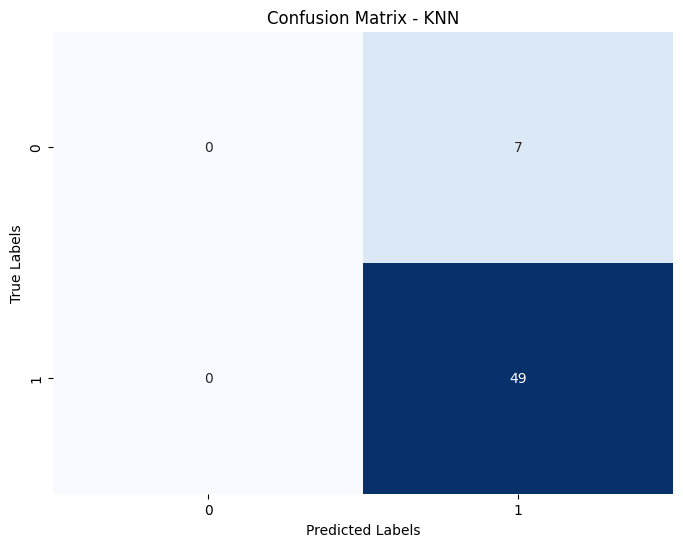

In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume df is the feature dataframe and 'Etiquette' is the target label
labels = df['Etiquette']
features = df.drop(columns=['Etiquette'])

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Fit the imputer on the training data and transform both training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a K-Nearest Neighbors Classifier (KNN)
knn_clf = KNeighborsClassifier(n_neighbors=5)  # You can change the number of neighbors (k)
knn_clf.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test_imputed)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='macro')  # 'macro' for multi-class
recall_knn = recall_score(y_test, y_pred_knn, average='macro')         # 'macro' for multi-class

print(f'Accuracy of the KNN: {accuracy_knn:.3f}')
print(f'Precision of the KNN: {precision_knn:.3f}')
print(f'Recall of the KNN: {recall_knn:.3f}')

# Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== Decision Tree ===
Accuracy: 0.821
Precision: 0.648
Recall: 0.714

Confusion Matrix:
[[ 4  3]
 [ 7 42]]


=== SVM ===
Accuracy: 0.875
Precision: 0.438
Recall: 0.500

Confusion Matrix:
[[ 0  7]
 [ 0 49]]


=== KNN ===
Accuracy: 0.875
Precision: 0.438
Recall: 0.500

Confusion Matrix:
[[ 0  7]
 [ 0 49]]


=== Random Forest ===
Accuracy: 0.911
Precision: 0.954
Recall: 0.643

Confusion Matrix:
[[ 2  5]
 [ 0 49]]




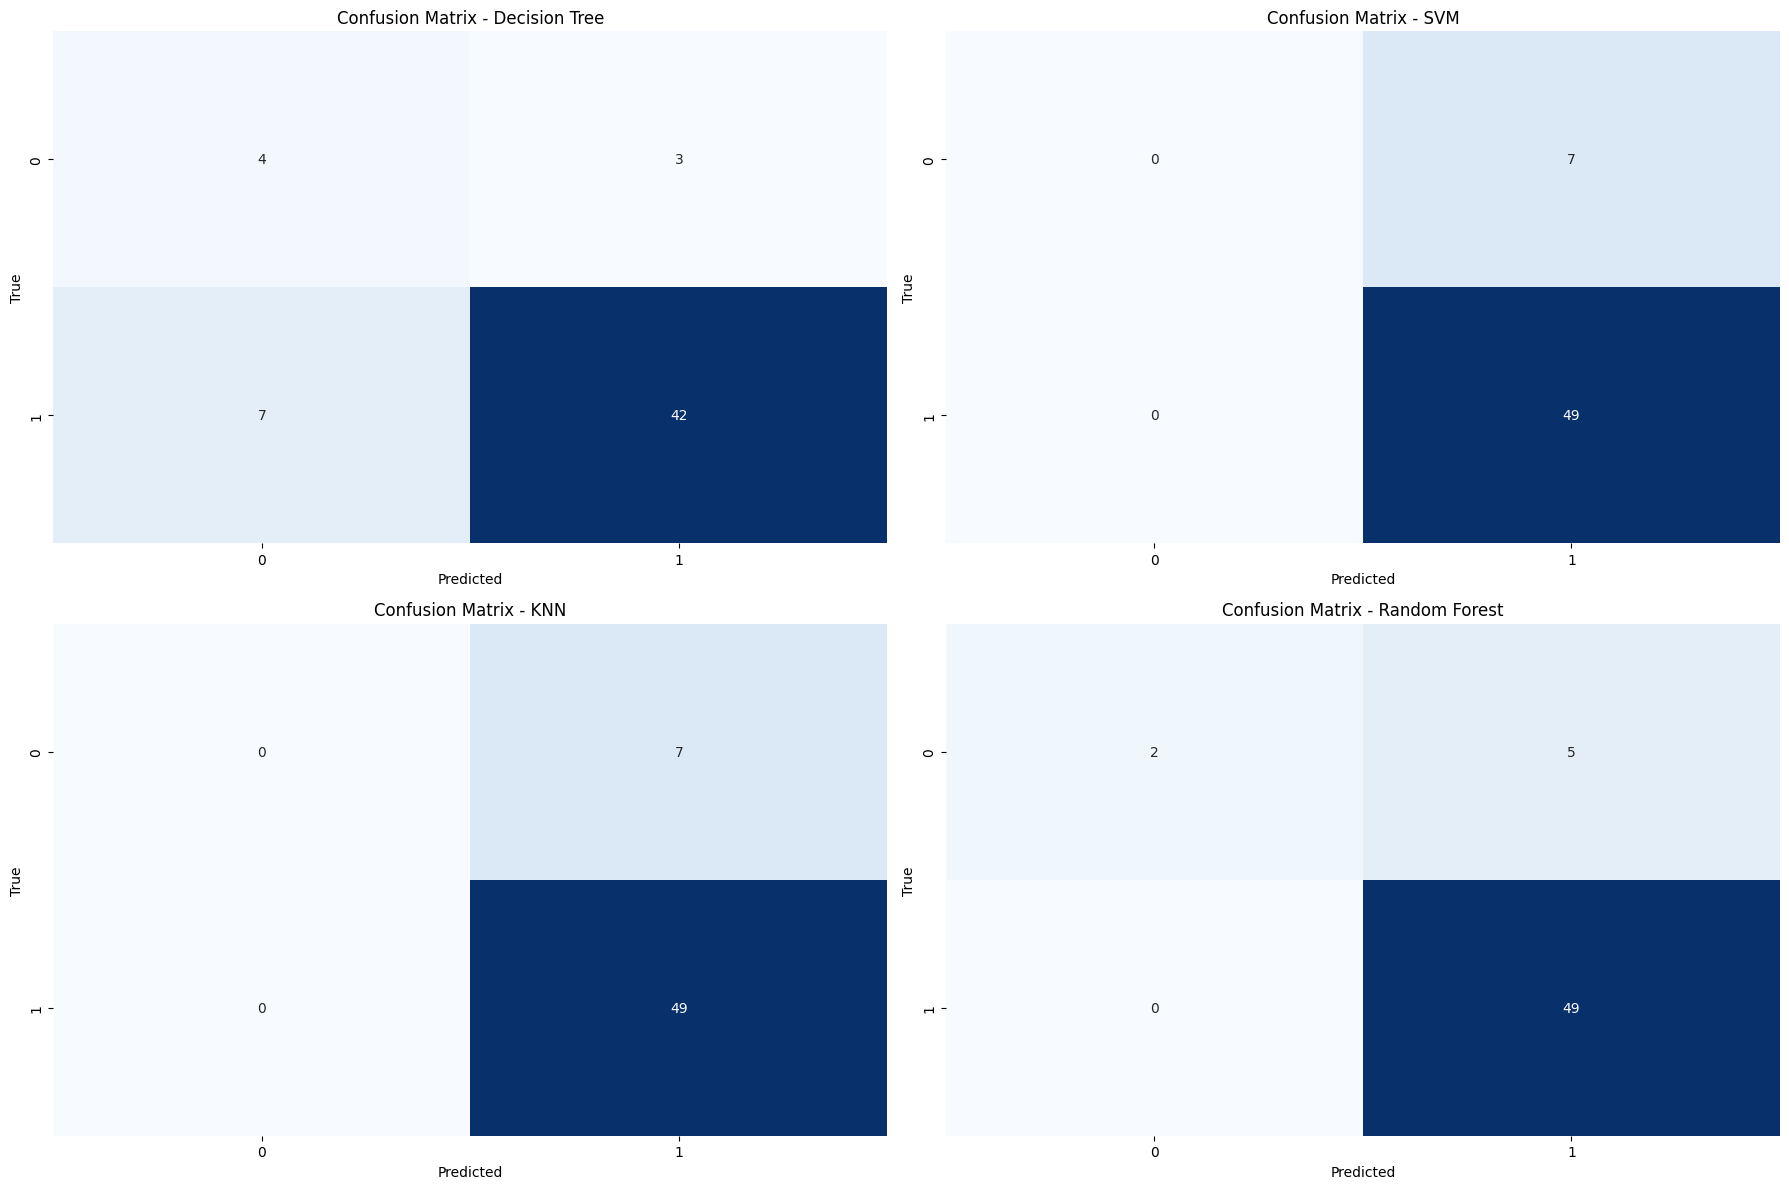

In [70]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Suppose df is your features dataframe and 'Etiquette' is your label
labels = df['Etiquette']
features = df.drop(columns=['Etiquette'])

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# Fit the imputer on the training data and transform both sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initializing the models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # You can adjust 'k' here
    'Random Forest': RandomForestClassifier()
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_imputed, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_imputed)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')  # 'macro' for multi-class
    recall = recall_score(y_test, y_pred, average='macro')        # 'macro' for multi-class

    # Store the results
    results[model_name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

# Display the results
for model_name, metrics in results.items():
    print(f"=== {model_name} ===")
    print(f"Accuracy: {metrics['accuracy']:.3f}")
    print(f"Precision: {metrics['precision']:.3f}")
    print(f"Recall: {metrics['recall']:.3f}")
    print("\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    print("\n" + "="*30 + "\n")

# Plotting confusion matrices for each model
plt.figure(figsize=(18, 12))
for i, (model_name, metrics) in enumerate(results.items(), 1):
    plt.subplot(2, 2, i)
    sns.heatmap(metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')

plt.tight_layout()
plt.show()


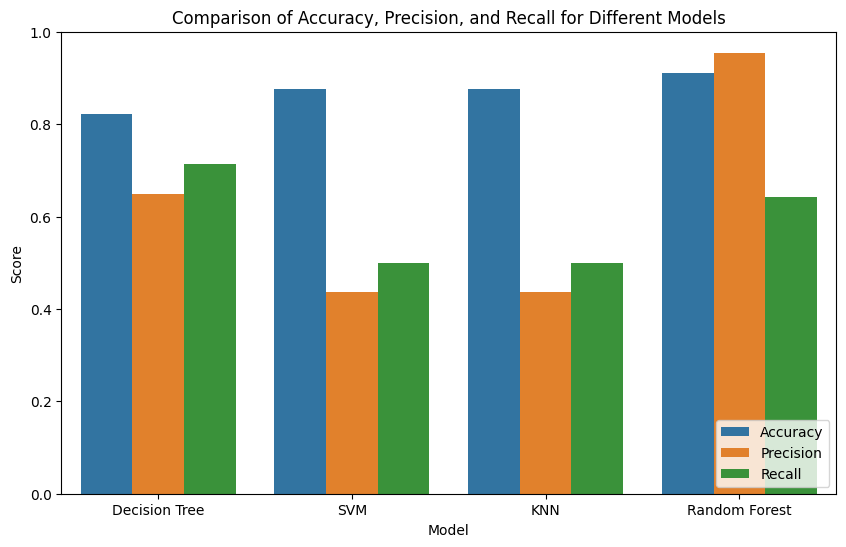

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convertir les résultats en un DataFrame pour une visualisation facile
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'SVM', 'KNN', 'Random Forest'],
    'Accuracy': [results['Decision Tree']['accuracy'], results['SVM']['accuracy'], results['KNN']['accuracy'], results['Random Forest']['accuracy']],
    'Precision': [results['Decision Tree']['precision'], results['SVM']['precision'], results['KNN']['precision'], results['Random Forest']['precision']],
    'Recall': [results['Decision Tree']['recall'], results['SVM']['recall'], results['KNN']['recall'], results['Random Forest']['recall']]
})

# Réorganisation des données pour qu'elles soient faciles à visualiser avec Seaborn
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Création d'un diagramme en rectangles (bar chart)
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)
plt.title('Comparison of Accuracy, Precision, and Recall for Different Models')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 1)  # Les scores étant des pourcentages ou ratios, on limite de 0 à 1
plt.legend(loc='lower right')
plt.show()


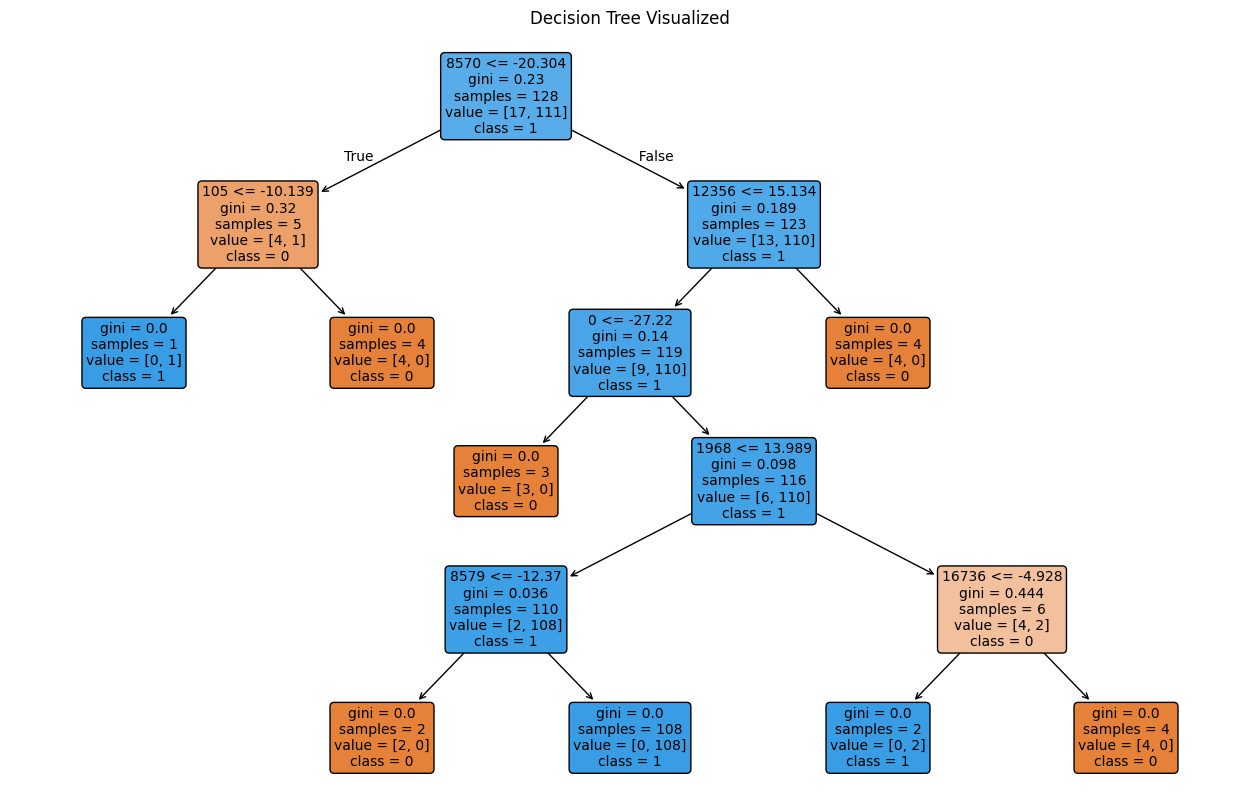

In [74]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Créer l'arbre de décision (modèle déjà formé)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Convertir les classes en chaînes de caractères pour éviter l'erreur
class_names = [str(c) for c in clf.classes_]

# Visualiser l'arbre de décision
plt.figure(figsize=(16, 10))  # Définir la taille de la figure pour une meilleure visibilité
plot_tree(clf,
          filled=True,  # Colorer les feuilles en fonction de la classe prédite
          feature_names=features.columns,  # Ajouter les noms des caractéristiques
          class_names=class_names,  # Convertir les classes en chaînes de caractères
          rounded=True,  # Utiliser des rectangles arrondis
          proportion=False,  # Afficher le nombre d'échantillons plutôt que des proportions
          fontsize=10)  # Taille de la police

plt.title('Decision Tree Visualized')
plt.show()
